<a href="https://colab.research.google.com/github/Yatharth19/ML/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.shape

(2290, 6)

In [ ]:
#we will predict gld
correlation=df.corr()

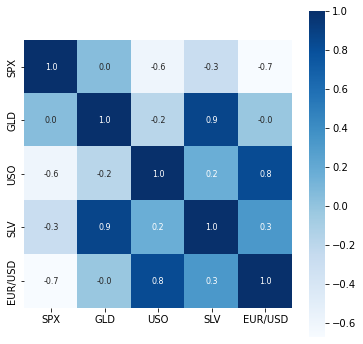

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Plotting distribution graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


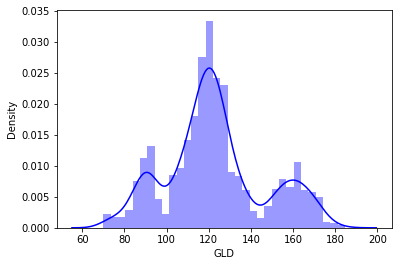

In [ ]:
sns.distplot(df['GLD'],color='blue')

In [ ]:
X=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.2,random_state=2)

In [ ]:
def score(model,X,y):
  model.fit(X,y)
  return model.score(X,y)


In [ ]:
model1=LinearRegression()
score(model1,X_train,Y_train)

0.8854497641208702

In [ ]:
model1.score(X_test,Y_test)

0.8799745494892806

In [ ]:
model2=RandomForestRegressor()
score(model2,X_train,Y_train)

0.9969011538569155

In [ ]:
model2.score(X_test,Y_test)

0.9752498371959618

In [ ]:
Y_predicted=model2.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,Y_predicted)
print(error_score)

0.9752498371959618


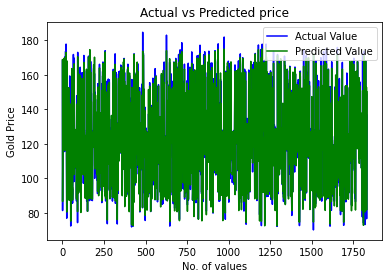

In [ ]:
Y_test=list(Y_test) # otherwise it may give error
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(Y_predicted,color='green',label='Predicted Value')
plt.title('Actual vs Predicted price')
plt.xlabel('No. of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()